In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap
from cycler import cycler
from matplotlib.pyplot import cm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
# import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# Nitrogen data

In [31]:
myfile = '~/Documents/GitHub/data/cleaned_ndata_12-22-2019.csv'
ndata = pd.read_csv(myfile, sep=',') 
ndata = ndata[ndata['Region'] == 'SEUS']
ndata = ndata[['Sample ID2', 'Glu','Asp','Ala','Ile','Leu','Pro','Val','Gly','Ser','Lys','Tyr','Phe','Thr']]
q = ndata[ndata['Sample ID2'] == "Savannah Banks-4902"]
w = ndata[ndata['Sample ID2'] == "Jacksonville-4907"]
e = ndata[ndata['Sample ID2'] == "Jacksonville-4684"]

mean = q.mean(axis=0)
std = q.std(axis=0)
sav = pd.DataFrame(mean,columns = ['sav4902_mean'])
sav['sav4902_std'] = std

mean = w.mean(axis=0)
std = w.std(axis=0)
jack1 = pd.DataFrame(mean,columns = ['jack4907_mean'])
jack1['jack4907_std'] = std

mean = e.mean(axis=0)
std = e.std(axis=0)
jack2 = pd.DataFrame(mean,columns = ['jack4684_mean'])
jack2['jack4684_std'] = std

df = pd.concat([sav, jack1, jack2], axis=1)
df.index.name = 'amino acid'
df.reset_index(inplace=True)

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

   amino acid  sav4902_mean  sav4902_std  jack4907_mean  jack4907_std  \
0         Glu     16.327143     1.690589        16.0400      1.319267   
1         Asp     17.944286     2.799184        13.6475      1.046275   
2         Ala     19.772857     1.851366        16.7300      2.491947   
3         Ile     23.741429     1.632987        19.7925      0.487673   
4         Leu     23.347143     2.235693        19.1900      1.845373   
5         Pro     32.395714     1.835891        25.7575      0.647167   
6         Val     21.374286     0.968880        16.1200      1.354425   
7         Gly     11.552857     0.817042        11.6075      1.039659   
8         Ser     12.932857     2.462314         8.6225      2.726284   
9         Lys           NaN          NaN            NaN           NaN   
10        Tyr           NaN          NaN            NaN           NaN   
11        Phe     10.104286     1.926533        10.8725      1.957096   
12        Thr           NaN          NaN           

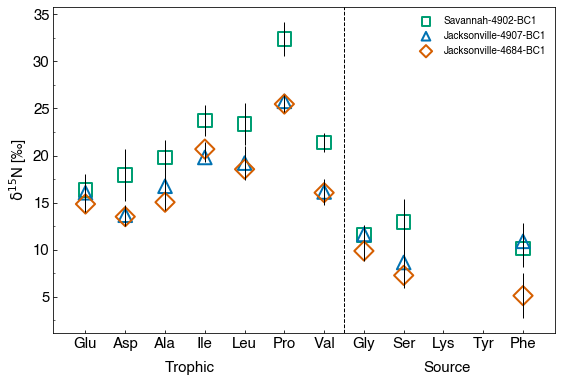

In [35]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize=(9, 6))
x = df['amino acid']
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
markersize = 12
size = 185

linewidth = 1
plt.errorbar(x,df['sav4902_mean'], yerr=[df['sav4902_std'],df['sav4902_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4907_mean'], yerr=[df['jack4907_std'],df['jack4907_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4684_mean'], yerr=[df['jack4684_std'],df['jack4684_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

# ax.plot(x, 'sav4902_mean', data = df, marker = 's', markersize = markersize, 
#         linewidth = 0, label = 'Savannah-4902-BC1', markeredgecolor = '#009E73', markerfacecolor = 'None')
# ax.plot(x, 'jack4907_mean', data = df, marker = '^', markersize = markersize, 
#         linewidth = 0, label = 'Jacksonville-4907-BC1', markeredgecolor = '#0072B2', markerfacecolor = 'None')
# ax.plot(x, 'jack4684_mean', data = df, marker = 'o', markersize = markersize,
#         linewidth = 0, label = 'Jacksonville-4686-BC1', markeredgecolor = '#D55E00', markerfacecolor = 'None')
ax.scatter(x, 'sav4902_mean', data = df, marker = 's', s = size,
        linewidth = 2, label = 'Savannah-4902-BC1', edgecolor = '#009E73', facecolor = 'None')
ax.scatter(x, 'jack4907_mean', data = df, marker = '^', s = size,
        linewidth = 2, label = 'Jacksonville-4907-BC1', edgecolor = '#0072B2', facecolor = 'None')
ax.scatter(x, 'jack4684_mean', data = df, marker = 'D', s = size,
        linewidth = 2, label = 'Jacksonville-4684-BC1', edgecolor = '#D55E00', facecolor = 'None')

ax.set_ylabel(n, size = 15)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
plt.axvline(x=6.5, linewidth = 1, color = 'black', linestyle = '--')

lgnd = plt.legend(frameon = False, loc = 0)
lgndsize = 75
lgnd.legendHandles[0]._sizes = [lgndsize]
lgnd.legendHandles[1]._sizes = [lgndsize]
lgnd.legendHandles[2]._sizes = [lgndsize]

plt.text(8.5, -3, "Source", fontsize=15)
plt.text(2, -3, "Trophic", fontsize=15)

# ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')

plt.savefig('fig_mean_aa_plot.png', dpi = 300, bbox_inches='tight')

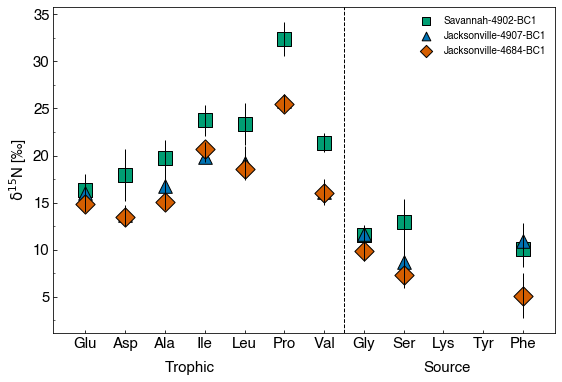

In [40]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize=(9, 6))
x = df['amino acid']
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
markersize = 12
size = 185

linewidth = 1
plt.errorbar(x,df['sav4902_mean'], yerr=[df['sav4902_std'],df['sav4902_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4907_mean'], yerr=[df['jack4907_std'],df['jack4907_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4684_mean'], yerr=[df['jack4684_std'],df['jack4684_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

ax.scatter(x, 'sav4902_mean', data = df, marker = 's', s = size,
        linewidth = 1, label = 'Savannah-4902-BC1', edgecolor = 'k', facecolor = '#009E73')
ax.scatter(x, 'jack4907_mean', data = df, marker = '^', s = size,
        linewidth = 1, label = 'Jacksonville-4907-BC1', edgecolor = 'k', facecolor = '#0072B2')
ax.scatter(x, 'jack4684_mean', data = df, marker = 'D', s = size,
        linewidth = 1, label = 'Jacksonville-4684-BC1', edgecolor = 'k', facecolor = '#D55E00')

ax.set_ylabel(n, size = 15)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
plt.axvline(x=6.5, linewidth = 1, color = 'black', linestyle = '--')

lgnd = plt.legend(frameon = False, loc = 0)
lgndsize = 75
lgnd.legendHandles[0]._sizes = [lgndsize]
lgnd.legendHandles[1]._sizes = [lgndsize]
lgnd.legendHandles[2]._sizes = [lgndsize]

plt.text(8.5, -3, "Source", fontsize=15)
plt.text(2, -3, "Trophic", fontsize=15)

# ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')

plt.savefig('fig_mean_aa_plot.png', dpi = 300, bbox_inches='tight')

In [3]:
cdata = pd.read_csv("~/Documents/GitHub/data/schiff c-csiaa stetson_cleaned.csv")
# cdata = cdata[['Group.ID','Ala','Asx','Glx','Gly','Ser','Pro','Ile','Leu','Lys','Phe','Thr','Tyr','Val']]
cdata = cdata[['Group.ID','Gly','Ser','Asx','Glx','Pro','Ala','Thr','Ile','Val','Phe','Leu']]

# post1800 = cdata.iloc[0:5]
# pre1800 = cdata.iloc[6:]

In [4]:
# list(cdata.columns.values)
t_cdata = cdata.T
t_cdata = t_cdata.reset_index()
t_cdata.columns = t_cdata.iloc[0]
t_cdata = t_cdata.drop(t_cdata.index[0])

t_cdata[['STET-4904 7', 'STET-4904 8', 'STET-4904 22', 
             'STET-4904 25', 'STET-4904 40', 'STET-4904 46', 'STET-4904 103', 
             'STET-4904 109', 'STET-4904 135', 'STET-4904 170']] = t_cdata[['STET-4904 7', 'STET-4904 8', 'STET-4904 22', 
             'STET-4904 25', 'STET-4904 40', 'STET-4904 46', 'STET-4904 103', 
             'STET-4904 109', 'STET-4904 135', 'STET-4904 170']].apply(pd.to_numeric)

# t_cdata.iloc[:,:]
# t_cdata.index.name = 'amino acid'
# t_cdata.reset_index(inplace=True)

post = t_cdata.iloc[:,0:5]
pre = t_cdata.iloc[:,[0,6,7,8,9,10]]
pre.loc[:,'aa_mean'] = pre.mean(axis=1)
post.loc[:,'aa_mean'] = post.mean(axis=1)
pre.loc[:,'aa_std'] = pre.std(axis=1)
post.loc[:,'aa_std'] = post.std(axis=1)

print(pre)
print(post)

0  Group.ID  STET-4904 46  STET-4904 103  STET-4904 109  STET-4904 135  \
1       Gly     -2.486782      -1.521839       1.179310       0.191034   
2       Ser      6.556790      -0.933704      -1.930556      -4.400741   
3       Asx    -16.849495     -13.008030     -11.740152     -15.207879   
..      ...           ...            ...            ...            ...   
9       Val    -16.711833     -20.469200     -16.111000     -16.792400   
10      Phe    -20.357031     -21.560859     -19.111016     -22.362500   
11      Leu    -26.378636     -22.838000     -20.853273     -24.698545   

0   STET-4904 170    aa_mean    aa_std  
1       -1.752586  -0.878172  1.352255  
2        6.821296   1.222617  4.604628  
3      -13.758333 -14.112778  1.769990  
..            ...        ...       ...  
9      -16.371833 -17.291253  1.607623  
10     -21.988047 -21.075891  1.191644  
11     -25.730152 -24.099721  2.017013  

[11 rows x 8 columns]
0  Group.ID  STET-4904 7  STET-4904 8  STET-4904 22  STE

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# fig, ax = plt.subplots(figsize=(9, 6))
# x = t_cdata['Group.ID']
# c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
# linewidth = 1
# size = 100

# name = "Accent"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap.colors  # type: list
# ax.set_prop_cycle(color=colors)
# edgecolor = 'black'

# # ax.scatter(x, 'STET-4904 7', data = t_cdata, marker = 's', s = size,
# #         linewidth = linewidth, label = 'Savannah-4902-BC1', edgecolor = '#009E73', facecolor = 'None')
# # ax.scatter(x, 'STET-4904 8', data = t_cdata, marker = '^', s = size,
# #         linewidth = linewidth, label = 'Jacksonville-4907-BC1', edgecolor = '#0072B2', facecolor = 'None')
# # ax.scatter(x, 'STET-4904 22', data = t_cdata, marker = 'D', s = size,
# #         linewidth = linewidth, label = 'Jacksonville-4684-BC1', edgecolor = '#D55E00', facecolor = 'None')
# ax.scatter(x, 'STET-4904 25', data = t_cdata, marker = 's', s = size,
#         linewidth = linewidth, label = 'Savannah-4902-BC1', edgecolor = edgecolor)
# ax.scatter(x, 'STET-4904 40', data = t_cdata, marker = '^', s = size,
#         linewidth = linewidth, label = 'Jacksonville-4907-BC1', edgecolor = colors, facecolor = 'None')
# ax.scatter(x, 'STET-4904 46', data = t_cdata, marker = 'D', s = size,
#         linewidth = linewidth, label = 'Jacksonville-4684-BC1', facecolor = 'None')
# ax.scatter(x, 'STET-4904 103', data = t_cdata, marker = 's', s = size,
#         linewidth = linewidth, label = 'Savannah-4902-BC1', facecolor = 'None')
# ax.scatter(x, 'STET-4904 109', data = t_cdata, marker = '^', s = size,
#         linewidth = linewidth, label = 'Jacksonville-4907-BC1', facecolor = 'None')
# ax.scatter(x, 'STET-4904 135', data = t_cdata, marker = 'D', s = size,
#         linewidth = linewidth, label = 'Jacksonville-4684-BC1', facecolor = 'None')
# ax.scatter(x, 'STET-4904 170', data = t_cdata, marker = 'D', s = size,
#         linewidth = linewidth, label = 'Jacksonville-4684-BC1', facecolor = 'None')

# ax.set_ylabel(c, size = 15)
# for tick in ax.get_xticklabels():
# #     tick.set_fontname("Helvetica")
#     tick.set_fontsize(15)
# for tick in ax.get_yticklabels():
# #     tick.set_fontname("Helvetica")
#     tick.set_fontsize(15)
# plt.axvline(x=5.5, linewidth = 1, color = 'black', linestyle = '--')

In [74]:
# list(t_cdata.columns.values)
# t_cdata[['STET-4904 7', 'STET-4904 8', 'STET-4904 22', 
#              'STET-4904 25', 'STET-4904 40', 'STET-4904 46', 'STET-4904 103', 
#              'STET-4904 109', 'STET-4904 135', 'STET-4904 170']] = t_cdata[['STET-4904 7', 'STET-4904 8', 'STET-4904 22', 
#              'STET-4904 25', 'STET-4904 40', 'STET-4904 46', 'STET-4904 103', 
#              'STET-4904 109', 'STET-4904 135', 'STET-4904 170']].apply(pd.to_numeric)
# t_cdata.info()

['Group.ID',
 'STET-4904 7',
 'STET-4904 8',
 'STET-4904 22',
 'STET-4904 25',
 'STET-4904 40',
 'STET-4904 46',
 'STET-4904 103',
 'STET-4904 109',
 'STET-4904 135',
 'STET-4904 170']

Gly    -0.164517
Ser     0.753358
Asx   -13.937793
         ...    
Val   -16.619560
Phe   -21.113214
Leu   -23.841976
Length: 11, dtype: float64
Gly    1.797821
Ser    3.595499
Asx    1.898391
         ...   
Val    1.439827
Phe    1.315306
Leu    1.836776
Length: 11, dtype: float64


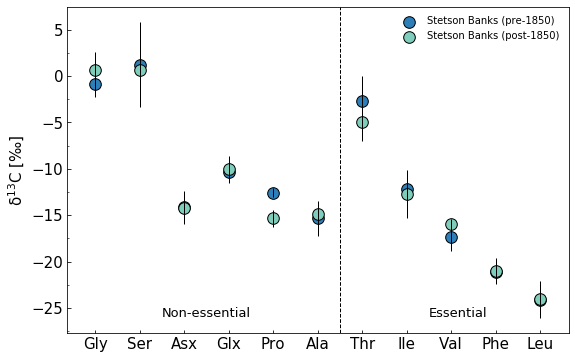

In [6]:
c_mean = cdata.mean(axis=0)
c_std = cdata.std(axis=0)

print(c_mean)
print(c_std)

stet_mean = pd.DataFrame(c_mean,columns = ['aa_mean'])
stet_mean['aa_std'] = c_std
stet_mean.index.name = 'amino acid'
stet_mean.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(9, 6))
c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
linewidth = 1
size = 135

x1 = pre.iloc[:,0]
x2 = post.iloc[:,0]

ax.scatter(x1, 'aa_mean', data = pre, marker = 'o', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#2c7fb8', label = "Stetson Banks (pre-1850)")
ax.scatter(x2, 'aa_mean', data = post, marker = 'o', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#7fcdbb', label = "Stetson Banks (post-1850)")

plt.errorbar(x1,pre['aa_mean'], yerr=[pre['aa_std'],pre['aa_std']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x1,post['aa_mean'], yerr=[post['aa_std'],post['aa_std']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')
ax.set_ylabel(c, size = 15)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
    
plt.legend(frameon = False, loc = 0)
plt.axvline(x=5.5, linewidth = 1, color = 'black', linestyle = '--')

plt.text(7.5, -26, "Essential", fontsize=13)
plt.text(1.5, -26, "Non-essential", fontsize=13)

plt.savefig('fig_csiaa_means.png', dpi = 300, bbox_inches='tight')

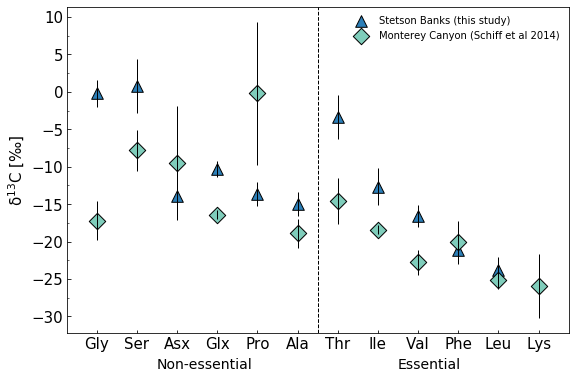

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
linewidth = 1
size = 135

bam_aa = pd.read_csv("~/Documents/GitHub/data/schiff_2014_aa_means.csv")

ax.scatter('amino acid', 'aa_mean', data = stet_mean, marker = '^', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#2c7fb8', label = "Stetson Banks (this study)")
plt.errorbar(stet_mean['amino acid'],stet_mean['aa_mean'], yerr=[stet_mean['aa_std'],stet_mean['aa_std']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

ax.scatter('amino acid', 'mean', data = bam_aa, marker = 'D', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#7fcdbb', label = "Monterey Canyon (Schiff et al 2014)")
plt.errorbar(bam_aa['amino acid'],bam_aa['mean'], yerr=[bam_aa['std'],bam_aa['std']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')
ax.set_ylabel(c, size = 15)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
    
plt.legend(frameon = False, loc = 0)
plt.axvline(x=5.5, linewidth = 1, color = 'black', linestyle = '--')

plt.text(7.5, -37, "Essential", fontsize=14)
plt.text(1.5, -37, "Non-essential", fontsize=14)

plt.savefig('fig_csiaa_means2.png', dpi = 300, bbox_inches='tight')

In [119]:
# x_col = 'Group.ID'
# y_columns = ['STET-4904 7', 'STET-4904 8', 'STET-4904 22', 
#              'STET-4904 25', 'STET-4904 40', 'STET-4904 46', 'STET-4904 103', 
#              'STET-4904 109', 'STET-4904 135', 'STET-4904 170']

# for y_col in y_columns:

#     figure = plt.figure
#     ax = plt.gca()
#     ax.scatter(t_cdata[x_col], t_cdata[y_col])
#     ax.set_xlabel(x_col)
#     ax.set_ylabel(y_col)
#     ax.set_title("{} vs {}".format(x_col, y_col))

#     plt.legend()
#     plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
amino acid       13 non-null object
sav4902_mean     10 non-null float64
sav4902_std      10 non-null float64
jack4907_mean    10 non-null float64
jack4907_std     10 non-null float64
jack4684_mean    10 non-null float64
jack4684_std     10 non-null float64
dtypes: float64(6), object(1)
memory usage: 856.0+ bytes


In [5]:
norm = pd.read_csv("~/Documents/GitHub/data/means_normalized_c-csia.csv")
norm

,aa,coral,coral_sd,euk,euk_sd,prok,prok_sd,bam,bam_sd
0,Gly,15.351100,1.976774,11.493846,11.431723,13.59,22.098968,3.964307,2.524936
1,Ser,16.268975,3.309743,NaN,NaN,23.58,9.137824,14.153667,3.438808
2,Asx,1.577824,1.776669,8.901538,9.102756,14.02,8.699900,11.625284,8.326378
...,...,...,...,...,...,...,...,...,...
9,Phe,-5.597596,1.255899,-2.621538,2.952033,1.96,4.221458,1.038888,2.669878
10,Leu,-8.326359,1.855865,-5.113846,2.154907,-3.28,2.591748,-3.961319,1.143603
11,Lys,-4.199198,4.049634,NaN,NaN,NaN,NaN,-4.792872,4.437294


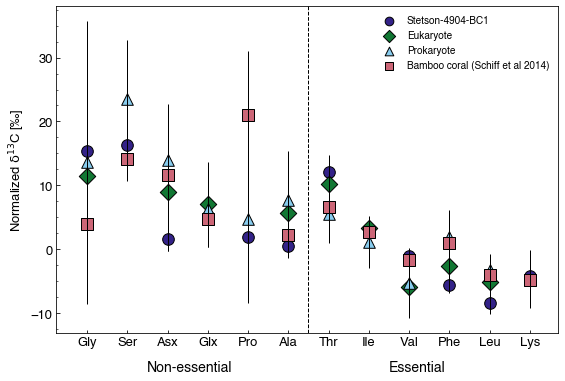

In [10]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize=(9, 6))
norm_c = r'Normalized $\mathrm{\delta}^{13}$C ['u"\u2030]"
linewidth = 1
size = 135

x = norm.iloc[:,0]

ax.scatter(x, 'coral', data = norm, marker = 'o', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#332288', label = 'Stetson-4904-BC1')
ax.scatter(x, 'euk', data = norm, marker = 'D', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#117733', label = 'Eukaryote')
ax.scatter(x, 'prok', data = norm, marker = '^', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#88CCEE', label = 'Prokaryote')
ax.scatter(x, 'bam', data = norm, marker = 's', s = size,
        linewidth = linewidth, edgecolor = 'black', facecolor = '#CC6677', label = 'Bamboo coral (Schiff et al 2014)')

plt.errorbar(x,norm['coral'], yerr=[norm['coral_sd'],norm['coral_sd']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,norm['euk'], yerr=[norm['euk_sd'],norm['euk_sd']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,norm['prok'], yerr=[norm['prok_sd'],norm['prok_sd']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,norm['bam'], yerr=[norm['bam_sd'],norm['bam_sd']], 
             fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')
ax.set_ylabel(norm_c, size = 13)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(13)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(13)
    
lgnd = plt.legend(frameon = False, loc = 0)
lgndsize = 75
lgnd.legendHandles[0]._sizes = [lgndsize]
lgnd.legendHandles[1]._sizes = [lgndsize]
lgnd.legendHandles[2]._sizes = [lgndsize]
lgnd.legendHandles[3]._sizes = [lgndsize]

plt.axvline(x=5.5, linewidth = 1, color = 'black', linestyle = '--')

plt.text(7.5, -19, "Essential", fontsize=14)
plt.text(1.5, -19, "Non-essential", fontsize=14)

plt.savefig('fig_csiaa_normalized.png', dpi = 300, bbox_inches='tight')

In [22]:
stet_mean

,amino acid,aa_mean,aa_std
0,Gly,-0.164517,1.797821
1,Ser,0.753358,3.595499
2,Asx,-13.937793,1.898391
...,...,...,...
8,Val,-16.619560,1.439827
9,Phe,-21.113214,1.315306
10,Leu,-23.841976,1.836776


In [23]:
bam_aa = pd.read_csv("~/Documents/GitHub/data/schiff_2014_aa_means.csv")
bam_aa

,amino acid,mean,std
0,Gly,-17.192310,2.631328
1,Ser,-7.781055,2.753859
2,Asx,-9.531333,7.651946
...,...,...,...
9,Phe,-20.117729,2.855671
10,Leu,-25.117936,1.176791
11,Lys,-25.949488,4.286046
